In [16]:
"""Problem 1"""

'Problem 1'

In [1]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import os
%matplotlib inline

In [2]:
# a: Set path to downloaded dataset
os.chdir("F:/Annie/CornellMS/Semester 4/Machine Learning/Homework/HW2")
print (os.getcwd())

F:\Annie\CornellMS\Semester 4\Machine Learning\Homework\HW2


In [3]:
# b: Load training and test set into matrix
def load_data(path):
    data_values, label_values = [], []
    with open(path) as f:
        for line in f:
            im = misc.imread(line.strip().split()[0])
            data_values.append(im.reshape(2500,))
            label_values.append(line.strip().split()[1])
    data_values, label_values = np.array(data_values, dtype=float), np.array(label_values, dtype=int)
    return data_values, label_values

train_data, train_labels = load_data('./faces/train.txt')
test_data, test_labels = load_data('./faces/test.txt')
        
print ("Training dataset shape is ", train_data.shape)
print ("Testing dataset shape is ", test_data.shape) 


C:\Users\Chandrima\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


Training dataset shape is  (540, 2500)
Testing dataset shape is  (100, 2500)


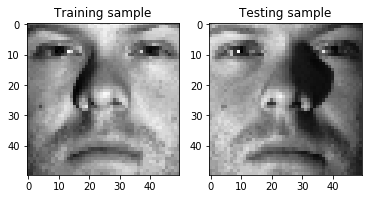

In [4]:
# Display random picture from train and test data
plt.subplot(1, 2, 1)
plt.imshow(train_data[1, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Training sample')

plt.subplot(1, 2, 2)
plt.imshow(test_data[1, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Testing sample')
plt.show()

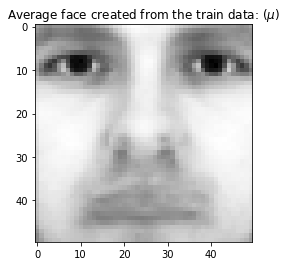

In [5]:
# c: Average face for training data
mu = np.apply_along_axis(np.mean, 0, train_data)
plt.imshow(mu.reshape(50,50), cmap = cm.Greys_r)
plt.title('Average face created from the train data: ($\mu$)')
plt.show()

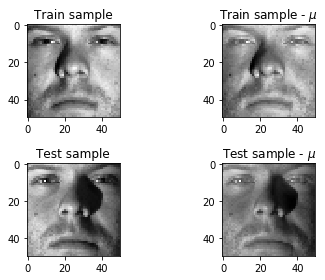

In [6]:
# d: Subtract mu from all train and test samples
train_avg = train_data - mu
test_avg = test_data - mu

plt.subplot(2,2,1)
plt.imshow(train_data[1, :].reshape(50,50), cmap = cm.Greys_r)
plt.title("Train sample")

plt.subplot(2,2,2)
plt.imshow(train_avg[1,:].reshape(50,50), cmap = cm.Greys_r)
plt.title("Train sample - $\mu$")

plt.subplot(2,2,3)
plt.imshow(test_data[1,:].reshape(50,50), cmap = cm.Greys_r)
plt.title("Test sample")

plt.subplot(2,2,4)
plt.imshow(test_avg[1,:].reshape(50,50), cmap = cm.Greys_r)
plt.title("Test sample - $\mu$")

plt.tight_layout()
plt.show()

In [7]:
# e: SVD decomposition
u, s, vh = np.linalg.svd(train_avg)
print (u.shape, s.shape, vh.shape)

(540, 540) (540,) (2500, 2500)


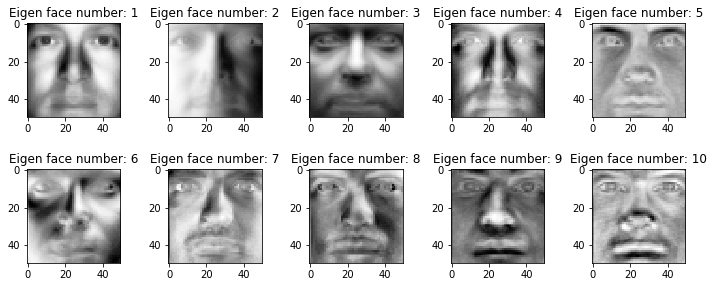

In [8]:
# Plot first 10 eigen face after SVD decomposition
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(vh[i,:].reshape(50,50), cmap = cm.Greys_r)
    plt.title('Eigen face number: %d' % (i+1))
plt.tight_layout()
plt.show()

In [9]:
# f: Low rank approx
low_rank_error = []
for i in range(1,201):
    Xr = u[:,:i].dot(np.diag(s[:i]).dot(vh[:i,:]))
    low_rank_error.append(np.linalg.norm(Xr-train_avg))

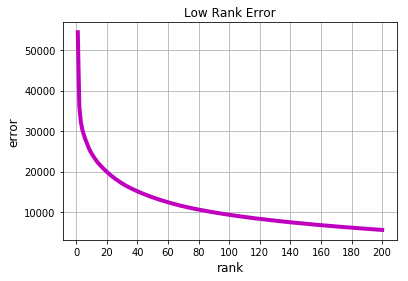

In [10]:
plt.plot(range(1, 201), low_rank_error, 'm', linewidth=4)
plt.xticks(range(0, 201, 20))
plt.title("Low Rank Error", fontsize=12)
plt.xlabel('rank', fontsize=12)
plt.ylabel('error', fontsize=12)
plt.grid()

In [11]:
# g: Eigenface feature
def eigenface_feature(V, X, r=1):
    return X.dot(V[:r, :].T)

def get_eigenface_feature(v, train, test, r=1):
    return eigenface_feature(v, train, r), eigenface_feature(v, test, r)

In [12]:
# h: Face Recognization
clf = LogisticRegression(solver='lbfgs', random_state=0, multi_class='ovr')
accuracy = []
for r in range(1, 201):
    training, testing = get_eigenface_feature(vh, train_avg, test_avg, r)  
    clf.fit(training, train_labels)
    accuracy.append(clf.score(testing, test_labels))
    
print (len(accuracy))

200


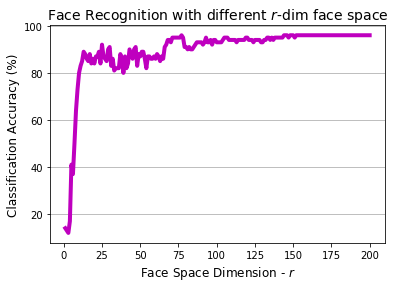

In [13]:
plt.plot(range(1,201), np.array(accuracy) * 100, 'm', linewidth=4)
plt.xticks(range(0, 201, 25))
plt.grid(axis='y')
plt.xlabel("Face Space Dimension - $r$", fontsize=12)
plt.ylabel("Classification Accuracy (%)", fontsize=12)
plt.title("Face Recognition with different $r$-dim face space", fontsize=14)
plt.show()

In [14]:
"""
References:
https://github.com/sidxiong/cornell-cs5785-ml
"""

'\nReferences:\nhttps://github.com/sidxiong/cornell-cs5785-ml\n'